In [9]:
import torch
import torch.nn.functional as F
import torch.nn.init as init
import math
import numpy as np
import pandas as pd
from torch.autograd import Variable
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#从本地读取数据
diabetes_data = pd.read_csv('diabetes.csv')
colume = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

diabetes_data[colume] = diabetes_data[colume].replace(0,np.nan)
thresh_count = diabetes_data.shape[0]*0.8
diabetes_data = diabetes_data.dropna(thresh=thresh_count, axis=1)
from sklearn.impute import SimpleImputer
imr = SimpleImputer(strategy='mean')

colume=['Glucose', 'BloodPressure', 'BMI']
diabetes_data[colume] = imr.fit_transform(diabetes_data[colume])

x = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data.Outcome
x = x.values
y = y.values
x = Variable(torch.from_numpy(x))
y = Variable(torch.from_numpy(y))
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x.numpy(),y.numpy(),test_size=0.3, stratify=y)
ss = StandardScaler()  
#特征归一化
x_train = Variable(torch.tensor(ss.fit_transform(x_train)))
x_test = Variable(torch.tensor(ss.fit_transform(x_test)))
y_train = Variable(torch.tensor(y_train))
y_test = Variable(torch.tensor(y_test))

In [35]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1 = torch.nn.Linear(6, 20)  
        self.l2 = torch.nn.Linear(20, 20)
        self.l3 = torch.nn.Linear(20, 20)
        self.l4 = torch.nn.Linear(20, 20)
        self.l5 = torch.nn.Linear(20, 1)
    def forward(self, x):
        x = F.relu(self.l1(x.float()))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        x = self.l5(x)
        return x
model = Model()
#model.apply(weights_init)
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)
Loss = []
Acc = []
EPOCHS = 7000
for epoch in range(EPOCHS):
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train.float().view(-1,1))
    preds = torch.tensor(y_pred >= 0)
    corrects = torch.sum(preds.byte() == y_train.view(-1,1).byte())
    acc = corrects.item()/len(x_train)
    if epoch%100 == 0:
        print("corrects:",corrects)
        print("epoch = {0}, loss = {1}, acc = {2}".format(epoch, loss, acc))
        Loss.append(loss)
        Acc.append(acc)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

d:\program_files\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


corrects: tensor(187)
epoch = 0, loss = 0.727455198764801, acc = 0.34823091247672255
corrects: tensor(350)
epoch = 100, loss = 0.6878438591957092, acc = 0.6517690875232774
corrects: tensor(350)
epoch = 200, loss = 0.666032075881958, acc = 0.6517690875232774
corrects: tensor(350)
epoch = 300, loss = 0.6552706360816956, acc = 0.6517690875232774
corrects: tensor(350)
epoch = 400, loss = 0.6499410271644592, acc = 0.6517690875232774
corrects: tensor(350)
epoch = 500, loss = 0.6472625732421875, acc = 0.6517690875232774
corrects: tensor(350)
epoch = 600, loss = 0.6458455324172974, acc = 0.6517690875232774
corrects: tensor(350)
epoch = 700, loss = 0.6449920535087585, acc = 0.6517690875232774
corrects: tensor(350)
epoch = 800, loss = 0.6443646550178528, acc = 0.6517690875232774
corrects: tensor(350)
epoch = 900, loss = 0.6437545418739319, acc = 0.6517690875232774
corrects: tensor(350)
epoch = 1000, loss = 0.643103301525116, acc = 0.6517690875232774
corrects: tensor(350)
epoch = 1100, loss = 0.6

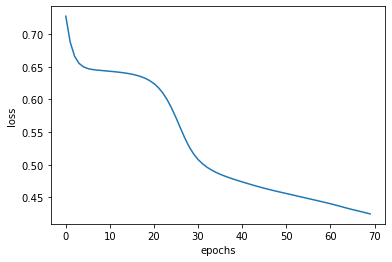

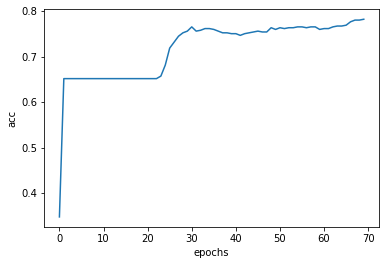

In [41]:
#-*- coding: utf-8 -*-
plt.plot(range(len(Loss)), Loss)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()
plt.plot(range(len(Acc)), Acc)
plt.ylabel('acc')
plt.xlabel('epochs')
plt.show()

In [37]:
y_pred = model(x_test)
preds = torch.tensor(y_pred >= 0)
corrects = torch.sum(preds.byte() == y_test.view(-1,1).byte())
acc = corrects.item()/len(x_test)
print("corrects:",corrects.numpy().item())
print("acc = {}".format(acc))

corrects: 191
acc = 0.8268398268398268


d:\program_files\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
